<a href="https://colab.research.google.com/github/ebiduardo/noteBooks/blob/main/juanFGV2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%%file eqtaxRL4-2.cpp
//%%file eqtaxRL4-2.cpp
// eqtaxRL4-2.cpp : Este arquivo contém a função 'main'.
// A execução do programa começa e termina ali.
//  eqtaxRL3
//  Created by JUAN PABLO GAMA TORRES on 19/08/21.
// modificado por eduardo garcia, bidu@lncc.br, em julho2022
#include <stdlib.h>
#include <iostream>
#include <math.h>
#include <stdio.h>
double pd(int j, double d);
double wffbc(double d, double* x, int i, double tc, double tb);
double wffbc1(double d, double* x, int i, double tc, double tb, double g, double eta, double rho);
double wffbc1t(double d, double* x, int i, double tc, double tb, double g, double eta, double rho, double t);

 double pd(int j, double d)
{
    double p=1, d1;
    int i=0;
    d1 = (d + 1)/2.0;
    while (i < j)
    {
        p = p * d1;
        i++;
    }
    return p;
}

//evaluate the welfare function in only one period
//AJUSTAR O VALOR DOS RISK LOVER PELO QUADRADO E DIVIDINDO POR DOIS!
double wffbc(double d, double* x, int i, double tc, double tb)
{
    double U=0.0;
    int j=0;
    //U = U + 2 * (1 - d) * log(((1 - d) * (1 - tc) * (x[j]))) / (pow(2,j));
    //U = U + 2 * (    d) * log( (    d) * (1 - tb) * (x[j]) ) / (pow(2,j));
    while (j <= i)// - 1)
    {
        U = U + 2 * (1 - d) * log(((1 - d) * (1 - tc) * (x[j] + x[0])) / 2) / (pow(2,j));
        U = U + 2 * (    d) * log( (    d) * (1 - tb) * (x[j] + x[0])  / 2) / (pow(2,j));
        j = j + 1;
    }
   // U = U + (1 - d) * log((1 - d) * (1 - tc) * x[j]) / (pow(2,j - 1));
   // U = U + (    d) * log((    d) * (1 - tb) * x[j]) / (pow(2,j - 1));
    U = U * pd(j - 1, d);
    return U;
}

//evaluate the welfare function in only one period
//AJUSTAR O VALOR DOS RISK LOVER PELO QUADRADO E DIVIDINDO POR DOIS!
double wffbc1(double d, double* x, int i, double tc, double tb, double g, double eta, double rho)
{
    double U=0.0;
    int j=0;
    //U = U + wffbc1t(d, x, i, tc, tb, g, eta, rho, j) * pow(d, j);// + 1);
    //j = j + 1;
    while (j < i )
    {
        U = U + wffbc1t(d, x, i-1, tc, tb, g, eta, rho, j) * pow(d, j + 1);
        j = j + 1;
    }
    U = U * (1 - d) / rho;
    return U;
}

//evaluate the welfare function in only one period
//AJUSTAR O VALOR DOS RISK LOVER PELO QUADRADO E DIVIDINDO POR DOIS!
double wffbc1t(double d, double* x, int i, double tc, double tb, double g, double eta, double rho, double t)
{
    double U=0.0, V=0.0;
    int j=0;
    U =  pow(x[j]*pow(g,t)*(1-d)*(1-tc),1-d)
       * pow(x[j]*pow(g,t)*(  d)*(1-tb),  d);
    U = pow(U, rho) / (pow(2,j));
    while (j < i )
    {
        V =     pow(pow(x[j]*pow(g,t)*(1-d)*(1-tc), 1-d)
 	          * pow(x[j]*pow(g,t)*(  d)*(1-tb),   d), 2);
        V = V + pow(pow(x[0]*pow(g,t)*(1-d)*(1-tc), 1-d)
		  * pow(x[0]*pow(g,t)*(  d)*(1-tb),   d), 2);
        V = sqrt(V/2.0);
    //printf("em wffbc1t, V=%e\n", V);//exit(0);
        U = U + pow(V,rho) / (pow(2.0,j));
        j = j + 1;
    }
    U = pow(U, eta / rho)-1;
    //printf("em wffbc1t, U=%e\n", U);exit(0);
    return U;
}

//compute the equilibrium for each state, then, compute the welfare function.
int main()
{
    FILE *sol, *u1Maxh, *u1h;
    sol    = fopen("eqtaxRL3solOGtax05-15-90-200-07-07.txt", "w");
    u1Maxh = fopen("u1Max.txt", "w"); u1h = fopen("solucaoU1.csv", "w");

    double tc1, tb1, g, R20, R10, R01, R25, wtbc, atbc;
    int    k;
    double U, U1;

    double lc=1.00/1, lb=lc, dT=10*lc/100.0;
    int K=200; double RR=9.0, RS=4.00, d=0.5, d1=d * 1.0, eta=0.7, rho=0.7;
    double tc=dT, tb=dT;

    double x[K + 5], y[K + 5], z1[9], z2[9]={0.0};

    tc = dT*2;// 0.01;
    while (tc < lc)
    {
        printf("tc = %lf\n", tc);
        tb = dT; printf("  tb = %lf\n", tb);
        while (tb < lb)
        {
            tc1  = tc / (1 - tc);
	          tb1  = tb / (1 - tb);
            atbc = (1 - tc*(1 - d) - d * (tb));
            //Comp with w+tx^
            //the averages are the only ones in real terms
            wtbc     =        tc1 * x[K + 2] * (1 - d) * (1 - tc) / atbc;
            wtbc     = wtbc + tb1 * x[K + 2] * (    d) * (1 - tb) / atbc;
            x[0]     = RS + wtbc;
            x[1]     =      wtbc;
            x[2]     = RR + wtbc;
            x[K + 2] = (RR / 2 + RS) /2.0;
            x[K + 3] = x[0] * atbc;
            x[K + 4] = (RR / 2 + wtbc) * atbc;
            U = wffbc(d1, x, 3, tb, tc);
            g        = x[2] / 1;
	          int i=1;
            while (i <= K)
            {
                y[K + 2] = (0.5)*(x[K+3]*d*(1-tb)*RS+0.5*x[K+4]*d*(1-tb)*RR)/atbc ;
                wtbc     =        tc1 * y[K + 2] * (1 - d) * (1 - tc) / atbc;
                wtbc     = wtbc + tb1 * y[K + 2] * (    d) * (1 - tb) / atbc;
                y[K + 3] = x[K + 3] / atbc * d * (1 - tb) * RS + wtbc;
                y[0]     = y[K + 3];
                y[1]     = wtbc;
                y[K + 3] = y[K + 3] * atbc;
                y[K + 4] = (x[K + 4] / atbc * d * (1 - tb) * RR / 2 + wtbc) * atbc;
                g        = y[K + 2] / x[K + 2];
                int j = 2;
                while (j < i + 2) {
                    y[j] = RR * d * x[j - 1] * (1 - tb) + wtbc;
                    j++;
                }
                x[K + 2] = y[K + 2]/g;
                x[K + 3] = y[K + 3]/g;
                x[K + 4] = y[K + 4]/g;
		            k = 0;
                while (k < i + 2) { x[k] = y[k]/g; k++; }
                U = U + wffbc(d1, x, k, tb, tc);
                i++;
            }
            U1  = wffbc1(d1, x, k, tb, tc, g, eta, rho);
            //printf("U1=%f, %f, %d, %f, %f, %f\n", U1, d1, k, g, eta, rho); exit(0);
                     //print("U1= ", U1, d1, k, g, eta, rho); return
            R20 = 0; R10 = 0; R01 = 0;
            R25 = x[4] * 0.02875 + x[5] * 0.015625 + x[6] * 0.005625;
            k = 0;
            while (k < i + 2)
            {
                if (k == 2) { R20 = x[k] * 0.075; }
                if (k >= 3)
                {
                    R20 = R20 + x[k] / pow(2,k + 1);
                    if (k == 3) { R10 = x[k] * 0.0375; }
                    if (k >= 4)
                    {
                        R10 = R10 + x[k] / pow(2,k + 1);
                        if (k == 6) { R01 =       x[k] * 0.0021875; }
                        if (k >= 7) { R01 = R01 + x[k] / pow(2,k + 1); }
                    }
                }
                k++;
            }
            R25 = R25 / x[K + 2] * atbc;
            R20 = R20 / x[K + 2] * atbc;
            R10 = R10 / x[K + 2] * atbc;
            R01 = R01 / x[K + 2] * atbc;
            //z1[0] = tb;  z1[1] = tc;  z1[2] = U;   z1[3] = g; z1[4] = R25; 
	          //z1[5] = R20; z1[6] = R10; z1[7] = R01; z1[8] = U1;
	          //printf("calc U1, tb = %f, tc =%f, U1 = %10.8f, z2[8] = %10.8f\n", tb,tc, U1, z2[8]);
            if (U1 > z2[8])
            {
            z2[0] = tb;  z2[1] = tc;  z2[2] = U;   z2[3] = g; z2[4] = R25; 
	          z2[5] = R20; z2[6] = R10; z2[7] = R01; z2[8] = U1;
            fprintf(u1Maxh, "%10.8lf %10.8lf %10.8e \n", tb, tc, U1);
            }

            fprintf(u1h, "%10.8lf, %10.8lf, %10.8lf\n", tb, tc, U1 );

            fprintf(sol, "\n %10.8lf %10.8lf     %10.8lf %10.8lf %10.8lf    ", tb, tc, U, U1, g);
            fprintf(sol, "%10.8lf %10.8lf %10.8lf  %10.8lf \n", R25, R20, R10, R01);
            tb = tb + dT;//0.01;
        }
        printf("  tb = %lf\n", tb);
        tc = tc + dT;//0.01;

    }
    //printf("\n\nPressione qualquer tecla alfa-numerica e depois");
    //printf(" ENTER para terminar.\n");
    //char *T; scanf_s("%s", &T);
    return 0;
}

// Executar programa: Ctrl + F5 ou Menu Depurar > Iniciar Sem Depuração
// Depurar programa: F5 ou menu Depurar > Iniciar Depuração

// Dicas para Começar: 
//   1. Use a janela do Gerenciador de Soluções para adicionar/gerenciar arquivos
//   2. Use a janela do Team Explorer para conectar-se ao controle do código-fonte
//   3. Use a janela de Saída para ver mensagens de saída do build e outras mensagens
//   4. Use a janela Lista de Erros para exibir erros
//   5. Ir Para o Projeto > Adicionar Novo Item para criar novos arquivos de código, ou Projeto > Adicionar Item Existente para adicionar arquivos de código existentes ao projeto
//   6. No futuro, para abrir este projeto novamente, vá para Arquivo > Abrir > Projeto e selecione o arquivo. sln



Overwriting eqtaxRL4-2.cpp


In [20]:
!g++  -Ofast eqtaxRL4-2.cpp -o eqtaxRL4-2
!TIMEFORMAT='%3lR %3lU %3lS'
!rm u1Max.txt; ./eqtaxRL4-2 # |head -n 4 
!ls -ltr
#!head -n 3 u1Max.txt;echo -----------------------;tail -n 3 u1Max.txt |tac
!head -n 3 solucaoU1.csv;echo -----------------------;tail -n 3 solucaoU1.csv |tac
!echo solucao python
!head -n 3 solucaoU1py.csv;echo -----------------------;tail -n 3 solucaoU1py.csv |tac

tc = 0.200000
  tb = 0.100000
  tb = 1.100000
tc = 0.300000
  tb = 0.100000
  tb = 1.100000
tc = 0.400000
  tb = 0.100000
  tb = 1.100000
tc = 0.500000
  tb = 0.100000
  tb = 1.100000
tc = 0.600000
  tb = 0.100000
  tb = 1.100000
tc = 0.700000
  tb = 0.100000
  tb = 1.100000
tc = 0.800000
  tb = 0.100000
  tb = 1.100000
tc = 0.900000
  tb = 0.100000
  tb = 1.100000
tc = 1.000000
  tb = 0.100000
  tb = 1.100000
total 64
drwxr-xr-x 1 root root  4096 Jun 29 13:44 sample_data
-rw-r--r-- 1 root root  3699 Jul  5 18:44 solucaoU1py.csv
-rw-r--r-- 1 root root  8309 Jul  5 18:48 eqtaxRL4-2.cpp
-rw-r--r-- 1 root root  3661 Jul  5 18:48 solucaoU0.csv
-rwxr-xr-x 1 root root 18616 Jul  5 18:52 eqtaxRL4-2
-rw-r--r-- 1 root root   532 Jul  5 18:52 u1Max.txt
-rw-r--r-- 1 root root  3661 Jul  5 18:52 solucaoU1.csv
-rw-r--r-- 1 root root 10463 Jul  5 18:52 eqtaxRL3solOGtax05-15-90-200-07-07.txt
0.10000000, 0.20000000, 13.09425809
0.20000000, 0.20000000, 10.27271542
0.30000000, 0.20000000, 8.15134999
---

In [12]:
import sys
import math
def pd ( j, d ) :
    d1 = (d + 1)/2.0
    p=1.0
    i=0
    while i < j :
        p = p * d1
        i+=1
    return p
#  def wffbc1 (double d, double* x, int i, double tc, double tb, double g, double eta, double rho):
def wffbc1 ( d,  x,  i,  tc,  tb,  g,  eta,  rho):
    U=0.0;
    j=0;
    while (j < i ):
        U = U + wffbc1t(d, x, i-1, tc, tb, g, eta, rho, j) * pow(d,j + 1);
        j = j + 1;
    U = U * (1 - d) / rho;
    return U;

#double wffbc1t(double d, double* x, int i, double tc, double tb, double g, double eta, double rho, double t)
def wffbc1t(d,  x,  i,  tc,  tb,  g,  eta,  rho,  t):
    U=0.0; V=0.0;
    j=0;
    U = pow(x[j]*pow(g,t)*(1-d)*(1-tc),1-d) * pow(x[j]*pow(g,t)*(  d)*(1-tb),  d);
    U = pow(U, rho) / (pow(2,j));
    
    while (j < i ):       
        V =     pow(pow(x[j]*pow(g,t)*(1-d)*(1-tc), 1-d) * pow(x[j]*pow(g,t)*(  d)*(1-tb),   d), 2);
        V = V + pow(pow(x[0]*pow(g,t)*(1-d)*(1-tc), 1-d) * pow(x[0]*pow(g,t)*(  d)*(1-tb),   d), 2);
        V = math.sqrt(V/2) ; 
        #print("em wffbc1t, V= ", V); 
        U = U + pow(V,rho) / pow(2.0,j);
        j = j + 1;
    U = pow(U, eta / rho)-1;
    #print("em wffbc1t, U= ", U); exit()
    return U;

import csv
def main(): 
  U1f = open('solucaoU1py.csv', mode='w')# as U1_file:
  U1_file = csv.writer(U1f, delimiter=',')

#f = open('path/to/csv_file', 'w')

# create the csv writer
#writer = csv.writer(f)
  U=0.0
  lc=1.00/1; lb=lc; dT=10.*lc/100.0;
  K=200; RR=9.0; RS=4.00; d=0.5; d1=d * 1.0; eta=0.7; rho=0.7;
  tc=dT; tb=dT;
  quit
  x=(K+5)*[0.0]; y=(K+5)*[0.0]; z2=9*[0.0];
  tc = dT*2;# 0.01;
  while (tc < lc):
        print("tc = ", tc);
        tb = dT; print("  tb = ", tb);
        while (tb < lb):
            tc1  = tc / (1 - tc);
            tb1  = tb / (1 - tb);
            atbc = (1 - tc*(1 - d) - d * (tb));
            #Comp with w+tx^
            #the averages are the only ones in real terms
            wtbc     =        tc1 * x[K + 2] * (1 - d) * (1 - tc) / atbc;
            wtbc     = wtbc + tb1 * x[K + 2] * (    d) * (1 - tb) / atbc;
            x[0]     = RS + wtbc;
            x[1]     =      wtbc;
            x[2]     = RR + wtbc;
            x[K + 2] = (RR / 2 + RS) /2.0;
            x[K + 3] = x[0] * atbc;
            x[K + 4] = (RR / 2 + wtbc) * atbc;
           # U = wffbc(d1, x, 3, tb, tc);
            g        = x[2] / 1;
            i=1;
            while (i <= K):
                y[K + 2] = (0.5)*(x[K+3]*d*(1-tb)*RS+0.5*x[K+4]*d*(1-tb)*RR)/atbc ;
                wtbc     =        tc1 * y[K + 2] * (1 - d) * (1 - tc) / atbc;
                wtbc     = wtbc + tb1 * y[K + 2] * (    d) * (1 - tb) / atbc;
                y[K + 3] = x[K + 3] / atbc * d * (1 - tb) * RS + wtbc;
                y[0]     = y[K + 3];
                y[1]     = wtbc;
                y[K + 3] = y[K + 3] * atbc;
                y[K + 4] = (x[K + 4] / atbc * d * (1 - tb) * RR / 2 + wtbc) * atbc;
                g        = y[K + 2] / x[K + 2];
                j = 2;
                while (j < i + 2) :
                    y[j] = RR * d * x[j - 1] * (1 - tb) + wtbc;
                    j+=1;
                
                x[K + 2] = y[K + 2]/g;
                x[K + 3] = y[K + 3]/g;
                x[K + 4] = y[K + 4]/g;
                k=0;
                while (k < i + 2):
                   x[k] = y[k]/g;
                   k+=1; 
                #U = U + wffbc(d1, x, k, tb, tc);
                i+=1;
            U1  = wffbc1(d1, x, k, tb, tc, g, eta, rho);
            #print("U1= ", U1, d1, k, g, eta, rho); return
            R20 = 0; R10 = 0; R01 = 0;
            R25 = x[4] * 0.02875 + x[5] * 0.015625 + x[6] * 0.005625;
            k = 0;
            while (k < i + 2):
                if (k == 2): R20 = x[k] * 0.075; 
                if (k >= 3):
                    R20 = R20 + x[k] / pow(2,k + 1);
                    if (k == 3):  R10 = x[k] * 0.0375; 
                    if (k >= 4):
                        R10 = R10 + x[k] / pow(2,k + 1);
                        if (k == 6): R01 =       x[k] * 0.0021875; 
                        if (k >= 7): R01 = R01 + x[k] / pow(2,k + 1); 
                k+=1;
            R25 = R25 / x[K + 2] * atbc;
            R20 = R20 / x[K + 2] * atbc;
            R10 = R10 / x[K + 2] * atbc;
            R01 = R01 / x[K + 2] * atbc;
            #z1[0] = tb;  z1[1] = tc;  z1[2] = U;   z1[3] = g; z1[4] = R25; 
	          #z1[5] = R20; z1[6] = R10; z1[7] = R01; z1[8] = U1;
	          #printf("calc U1, tb = %f, tc =%f, U1 = %10.8f, z2[8] = %10.8f\n", tb,tc, U1, z2[8]);
            if (U1 > z2[8]):
              z2[0] = tb;  z2[1] = tc;  z2[2] = U;   z2[3] = g; z2[4] = R25; 
              z2[5] = R20; z2[6] = R10; z2[7] = R01; z2[8] = U1;
              #printf(u1Maxh, "%10.8lf %10.8lf %10.8lf \n", tb, tc, U1);
              print(tb, tc, U1);
            #fprintf(u1h, "%10.8lf, %10.8lf, %10.8lf\n", tb, tc, U1 );
            U1_file.writerow([tb, tc, U1])
            #fprintf(sol, "\n %10.8lf %10.8lf     %10.8lf %10.8lf %10.8lf    ", tb, tc, U, U1, g);
            #fprintf(sol, "%10.8lf %10.8lf %10.8lf  %10.8lf \n", R25, R20, R10, R01);
            tb = tb + dT;#0.01;
        print("  tb = ", tb);
        tc = tc + dT; #0.01;

print(pd(3,5))
main()


27.0
tc =  0.2
  tb =  0.1
0.1 0.2 13.094258087243858
  tb =  1.0999999999999999
tc =  0.30000000000000004
  tb =  0.1
0.1 0.30000000000000004 21.46780513642667
  tb =  1.0999999999999999
tc =  0.4
  tb =  0.1
0.1 0.4 52.888108002045364
  tb =  1.0999999999999999
tc =  0.5
  tb =  0.1
0.1 0.5 2455.9608660176627
  tb =  1.0999999999999999
tc =  0.6
  tb =  0.1
0.1 0.6 16845278.91222678
  tb =  1.0999999999999999
tc =  0.7
  tb =  0.1
0.1 0.7 603750828183.493
  tb =  1.0999999999999999
tc =  0.7999999999999999
  tb =  0.1
0.1 0.7999999999999999 7.038608890341047e+16
  tb =  1.0999999999999999
tc =  0.8999999999999999
  tb =  0.1
0.1 0.8999999999999999 2.697249440455514e+22
  tb =  1.0999999999999999
tc =  0.9999999999999999
  tb =  0.1
0.1 0.9999999999999999 3.4184241053141006e+23
0.6 0.9999999999999999 3.504725832897932e+23
0.7 0.9999999999999999 3.747770603627531e+23
0.7999999999999999 0.9999999999999999 4.192196897550113e+23
0.8999999999999999 0.9999999999999999 5.202759718590439e+23


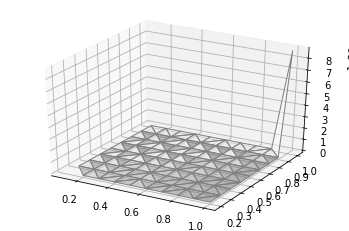

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#csvData = pd.read_csv('filename.csv')
csvData = pd.read_csv('solucaoU1py.csv')
csvData.head() # to display the first 5 lines of loaded data

# Get X, Y, Z
csvData = np.array(csvData)
csvData = csvData.astype(float)
X, Y, Z = csvData[:,0], csvData[:,1], csvData[:,2]

# Plot X,Y,Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
#ax.scatter(X, Y, Z, c='red')
plt.show()